In [3]:
from sklearn import datasets
from sklearn.cluster import KMeans

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
general_df = pd.read_csv('GENERAL.csv')
general_df.drop(general_df.columns [[0,2,7,8,9,16,17]], axis= 1 , inplace= True)
general_df=general_df.fillna(0.0)
general_df.isna()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
8945,False,False,False,False,False,False,False,False,False,False,False
8946,False,False,False,False,False,False,False,False,False,False,False
8947,False,False,False,False,False,False,False,False,False,False,False
8948,False,False,False,False,False,False,False,False,False,False,False


In [5]:
model = KMeans(n_clusters=3)
mat = general_df.values


In [6]:
model.fit(mat.data)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [7]:
all_predictions = model.predict(mat.data)

In [8]:
print(all_predictions)

[0 2 2 ... 0 0 0]


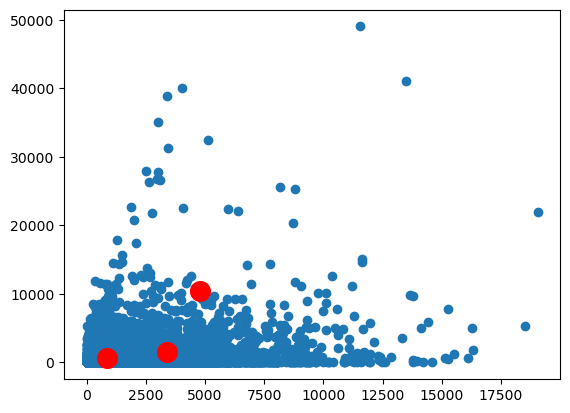

In [9]:
plt.scatter(mat[:,0], 
            mat[:,1])
plt.scatter(model.cluster_centers_[:, 0], 
            model.cluster_centers_[:, 1], 
            s=200,                             # Set centroid size
            c='red')                           # Set centroid color
plt.show()

In [10]:
!pip install clustergram

In [11]:
!pip install urbangrammar-graphics

In [12]:
from clustergram import Clustergram
import urbangrammar_graphics as ugg
from sklearn.preprocessing import scale

sns.set(style='whitegrid')

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


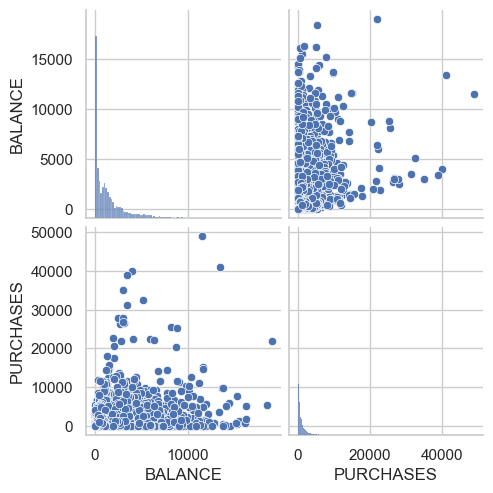

In [26]:
df=pd.read_csv('general.csv')
df=df.fillna(0)
cols_to_plot=['BALANCE', 'PURCHASES']
g = sns.pairplot(df[cols_to_plot], palette=ugg.COLORS[1:4])

K=1 skipped. Mean computed from data directly.
K=2 fitted in 23.684481859207153 seconds.
K=3 fitted in 26.453049421310425 seconds.
K=4 fitted in 27.52787971496582 seconds.
K=5 fitted in 28.557003021240234 seconds.
K=6 fitted in 31.309942960739136 seconds.
K=7 fitted in 33.8587601184845 seconds.
K=8 fitted in 37.28444266319275 seconds.
K=9 fitted in 35.466455936431885 seconds.


Text(0.5, 1.0, 'K-Means (scikit-learn)')

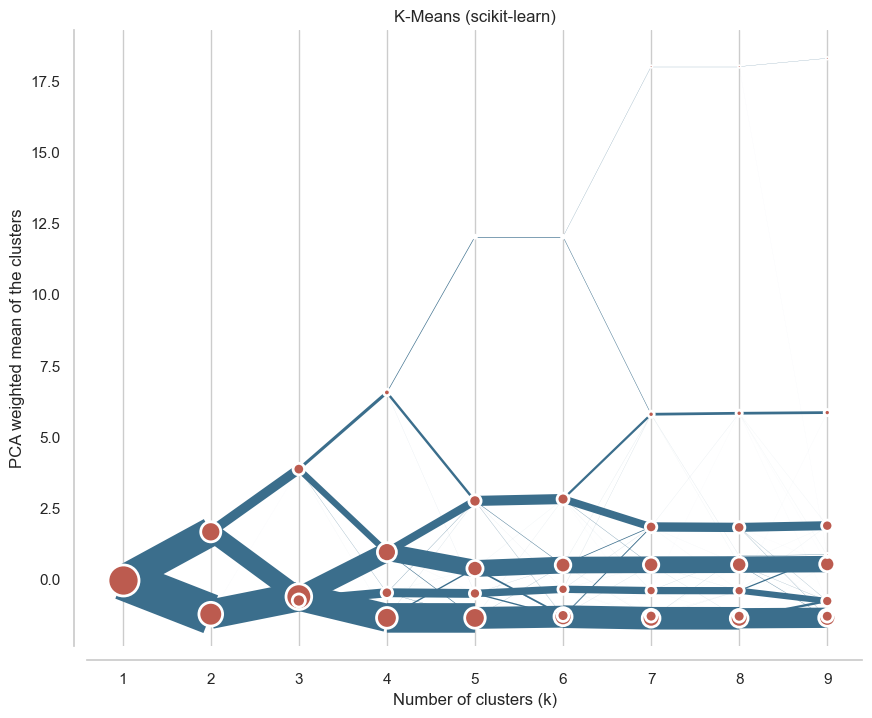

In [28]:
data = scale(df.drop(columns=['CUST_ID','TENURE']))

cgram = Clustergram(range(1, 10), n_init=1000)
cgram.fit(data)

ax = cgram.plot(
    figsize=(10, 8),
    line_style=dict(color=ugg.COLORS[1]),
    cluster_style={"color": ugg.COLORS[2]},
)
ax.yaxis.grid(False)
sns.despine(offset=10)
ax.set_title('K-Means (scikit-learn)')

In [29]:
from sklearn.manifold import TSNE

In [30]:
model = TSNE(learning_rate=100)

In [38]:
transformed = model.fit_transform(mat.data)

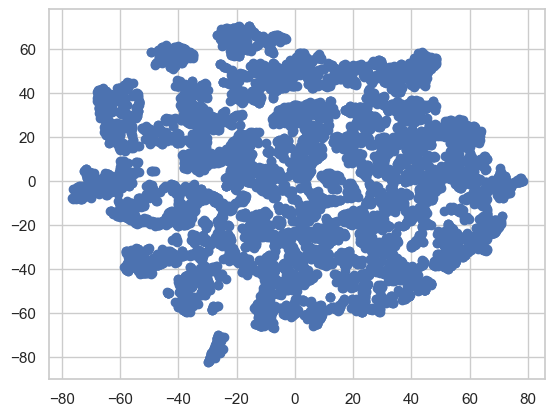

In [44]:
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis)
plt.show()

In [45]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [46]:
dbscan = DBSCAN()

In [47]:
dbscan.fit(mat.data)

DBSCAN()

In [48]:
pca = PCA(n_components=2).fit(mat.data)
pca_2d = pca.transform(mat.data)

NameError: name 'c1' is not defined

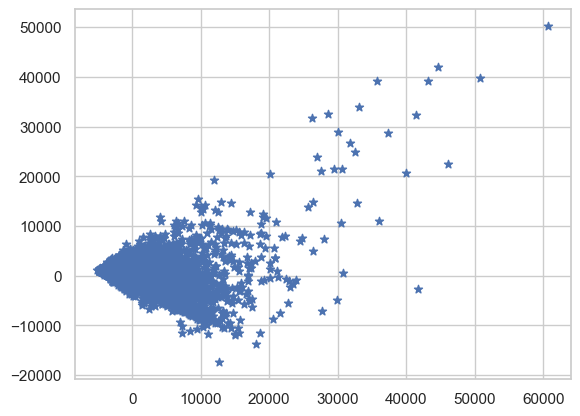

In [49]:
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Кластер 1', 'Кластер 2', 'Шум'])
plt.title('DBSCAN нашел 2 кластера и шум')
plt.show()